# Video game

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score



In [3]:
vg=pd.read_csv('/content/drive/MyDrive/Mycolllections/vgsales.csv')
vg

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
...,...,...,...,...,...,...,...,...,...,...,...
16319,16565,Mighty No. 9,XOne,2016,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
16320,16572,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
16321,16573,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16322,16579,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01


In [4]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16324 non-null  int64  
 1   Name          16324 non-null  object 
 2   Platform      16324 non-null  object 
 3   Year          16324 non-null  int64  
 4   Genre         16324 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16324 non-null  float64
 7   EU_Sales      16324 non-null  float64
 8   JP_Sales      16324 non-null  float64
 9   Other_Sales   16324 non-null  float64
 10  Global_Sales  16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [5]:
vg.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [6]:
vg.duplicated().sum()

0

In [7]:
vg.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16324.000000,16324.000000,16324.000000,16324.000000,16324.000000,16324.000000,16324.000000
mean,8291.508270,2006.404251,0.265464,0.147581,0.078673,0.048334,0.540328
std,4792.043734,5.826744,0.821658,0.508809,0.311584,0.189902,1.565860
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4135.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8293.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
vg.corr()

<ipython-input-8-1636566b4e80>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  vg.corr()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178443,-0.400330,-0.379029,-0.269141,-0.332525,-0.426884
Year,0.178443,1.000000,-0.091350,0.006142,-0.169320,0.041177,-0.074653
NA_Sales,-0.400330,-0.091350,1.000000,0.768932,0.451280,0.634503,0.941267
EU_Sales,-0.379029,0.006142,0.768932,1.000000,0.436408,0.726262,0.903269
JP_Sales,-0.269141,-0.169320,0.451280,0.436408,1.000000,0.290646,0.612790
Other_Sales,-0.332525,0.041177,0.634503,0.726262,0.290646,1.000000,0.747971
Global_Sales,-0.426884,-0.074653,0.941267,0.903269,0.612790,0.747971,1.000000


In [9]:
vg.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

# Visualization

<BarContainer object of 16324 artists>

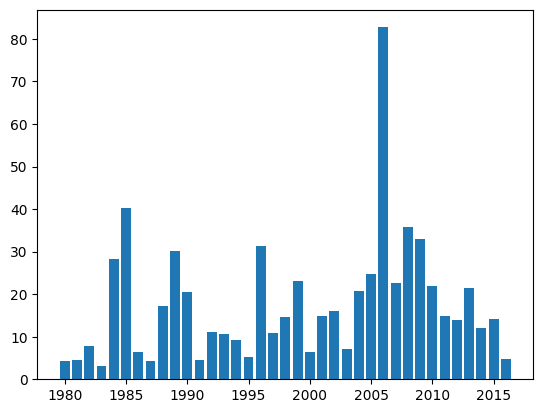

In [10]:
plt.bar('Year','Global_Sales',data=vg)

<BarContainer object of 16324 artists>

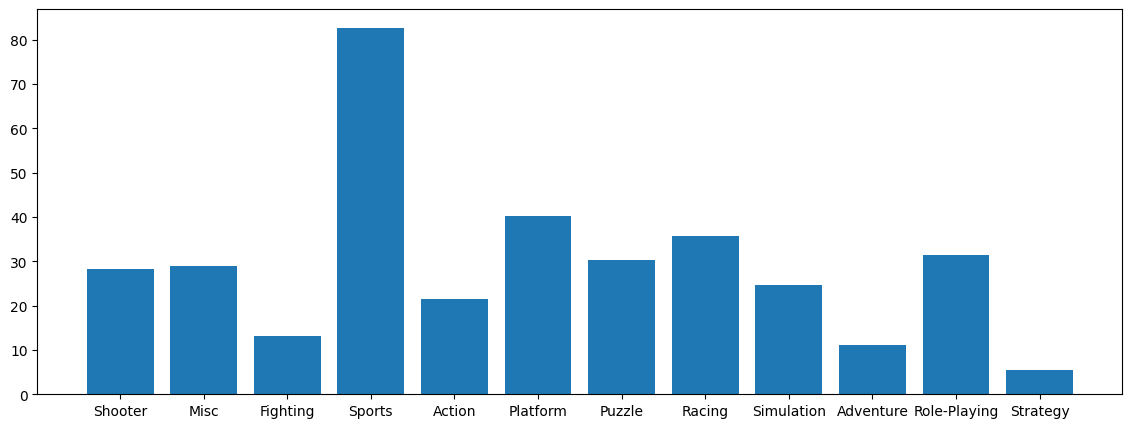

In [11]:
plt.figure(figsize=(14,5))
plt.bar('Genre','Global_Sales',data=vg)

<Axes: >

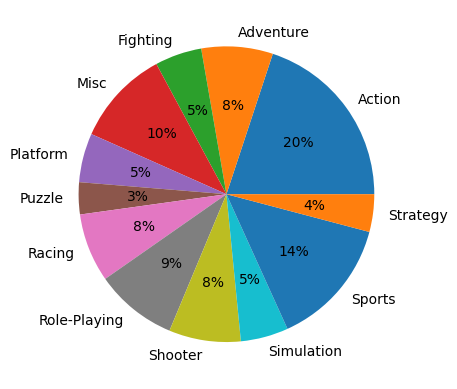

In [12]:
vg.groupby('Genre').size().plot.pie(autopct='%.0f%%')

<Axes: xlabel='Genre', ylabel='count'>

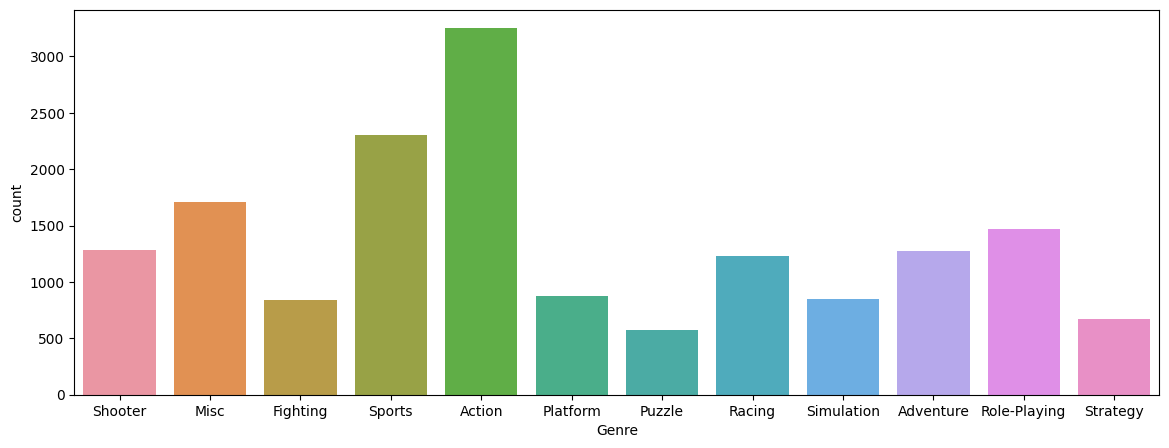

In [13]:
plt.figure(figsize=(14,5))
sns.countplot(x='Genre',data=vg)

<Axes: xlabel='Genre'>

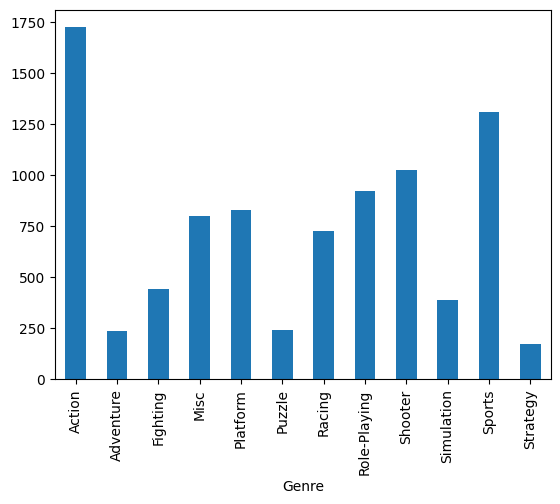

In [14]:
vg.groupby('Genre')['Global_Sales'].sum().plot.bar()

Model

In [15]:
vg.columns  #Global sales is the depentend data

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [16]:
x=vg[['Rank','NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         16324 non-null  int64  
 1   NA_Sales     16324 non-null  float64
 2   EU_Sales     16324 non-null  float64
 3   JP_Sales     16324 non-null  float64
 4   Other_Sales  16324 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 637.8 KB


In [17]:
y=vg[['Global_Sales']]
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16324 entries, 0 to 16323
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Global_Sales  16324 non-null  float64
dtypes: float64(1)
memory usage: 127.7 KB


# Model

Spliting the data set to train and test

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
print(x_train,y_train)


        Rank  NA_Sales  EU_Sales  JP_Sales  Other_Sales
9640   15492      0.00      0.02      0.00         0.00
1621   14408      0.00      0.00      0.03         0.00
14877   2445      0.36      0.35      0.00         0.14
9297   11569      0.07      0.00      0.00         0.01
10950  14052      0.03      0.00      0.00         0.00
...      ...       ...       ...       ...          ...
13418  14257      0.03      0.00      0.00         0.00
5390    4313      0.33      0.12      0.00         0.01
860     8253      0.10      0.07      0.00         0.01
15795  13860      0.03      0.01      0.00         0.00
7270    2140      0.78      0.03      0.03         0.13

[13059 rows x 5 columns]        Global_Sales
9640           0.02
1621           0.03
14877          0.85
9297           0.08
10950          0.04
...             ...
13418          0.03
5390           0.45
860            0.17
15795          0.04
7270           0.97

[13059 rows x 1 columns]


In [20]:
print(x_test,y_test)

        Rank  NA_Sales  EU_Sales  JP_Sales  Other_Sales
13218  11439      0.00      0.00      0.08         0.00
9511   14113      0.00      0.03      0.00         0.00
14618  11785      0.00      0.00      0.07         0.00
5527    6666      0.19      0.05      0.00         0.01
6550    9042      0.13      0.00      0.00         0.01
...      ...       ...       ...       ...          ...
5910   12255      0.05      0.01      0.00         0.00
5396    4415      0.06      0.33      0.02         0.03
12055  11979      0.01      0.04      0.00         0.01
12518   1400      0.76      0.48      0.02         0.12
10346   7361      0.14      0.06      0.00         0.02

[3265 rows x 5 columns]        Global_Sales
13218          0.08
9511           0.03
14618          0.07
5527           0.25
6550           0.14
...             ...
5910           0.06
5396           0.44
12055          0.07
12518          1.39
10346          0.21

[3265 rows x 1 columns]


In [21]:
model=LinearRegression()     #Training the model using linear Regression
model.fit(x_train,y_train)

LinearRegression()

       Feature    Importance
1     NA_Sales  1.000056e+00
3     JP_Sales  1.000031e+00
4  Other_Sales  9.999927e-01
2     EU_Sales  9.999503e-01
0         Rank  7.651855e-08


<Axes: xlabel='Importance', ylabel='Feature'>

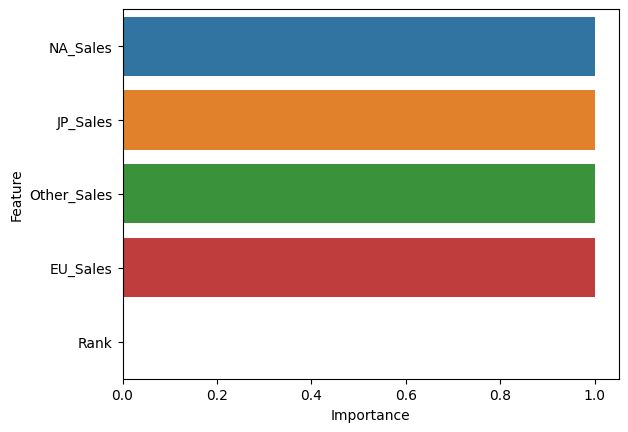

In [35]:
feature_important=pd.DataFrame(x_train.columns,columns=['Feature'])
ls=model.coef_
feature_important['Importance']=ls[0]
feature_important.sort_values('Importance',ascending=False,inplace=True)
print(feature_important)

sns.barplot(data=feature_important,y='Feature',x='Importance')

In [36]:
train_pred=model.predict(x_train) #preparing for evaluating of test data
test_pred=model.predict(x_test)

In [40]:
#Evaluating training set
MSE_train=mean_squared_error(y_train,train_pred)
R2_train=r2_score(y_train,train_pred)
score_train=model.score(x_train,y_train)
#Evaluating testing set
MSE_test=mean_squared_error(y_test,test_pred)
R2_test=r2_score(y_test,test_pred)
score_test=model.score(x_test,y_test)

print("result of training set  ")
print("Mean squared error      ",MSE_train)
print("R2 score                ",R2_train)
print("Model Score             ",score_train)

print("=========================")

print("result of training set  ")
print("Mean squared error      ",MSE_test)
print("R2 score                ",R2_test)
print("Model Score             ",score_test)


result of training set  
Mean squared error       2.694078202502954e-05
R2 score                 0.9999871342257697
Model Score              0.9999871342257697
result of training set  
Mean squared error       2.8019975583266953e-05
R2 score                 0.9999927834076412
Model Score              0.9999927834076412


In [41]:
if R2_train>0.84 and score_train>0.84 :
  print('Model was good')
else:
  print('Try another model')

Model was good


ploting prdiction results

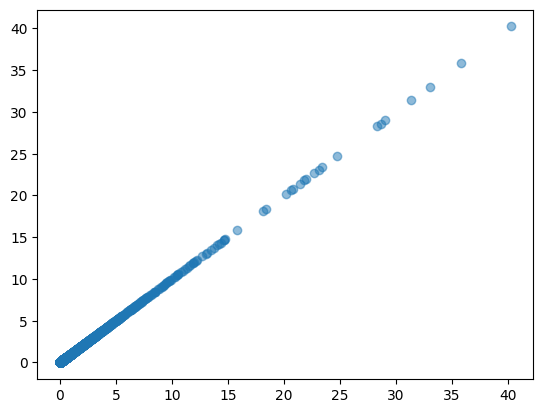

In [66]:
plt.scatter(x=y_train,y=train_pred,alpha=0.5)
